<a href="https://colab.research.google.com/github/VIHAN-droid/AI-ML-PROJECT/blob/main/SUPERVISED%20LEARNING/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=1)

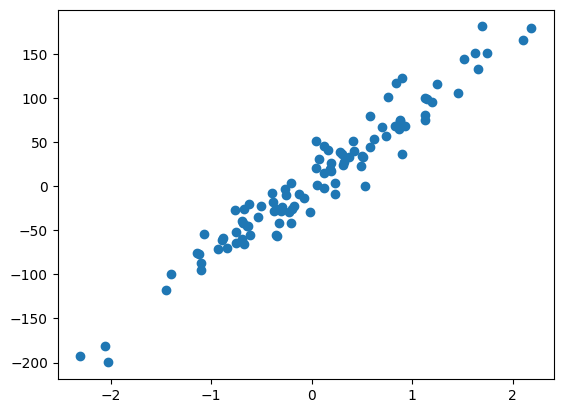

In [3]:
plt.scatter(x,y)

In [4]:
# FROM SKLEARN LIBRARY
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
print(lr.coef_) # m
print(lr.intercept_) # b

[82.48449929]
4.054028777621713


In [18]:
class GD:
  def __init__(self,learning_rate,epochs):
    self.m = 0
    self.b = 50
    self.lr = learning_rate
    self.ep = epochs

  def fit(self,x,y):
    for _ in range(self.ep):
      loss_slope_b = -2 * np.sum(y - self.m * x.ravel() - self.b)
      loss_slope_m = -2 * np.sum((y - self.m * x.ravel() - self.b) * x.ravel())

      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)
    print(self.m , self.b)

In [22]:
gd = GD(0.001,60)
gd.fit(x,y)  # using 0.1 and 0.01 were jumping between values thus lr was reduced to 0.001 and epochs were increased

82.48068771075751 4.055066777528049


# N-dim Gradient Descent (BATCH GD)

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [8]:
x,y = load_diabetes(return_X_y=True)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=2)
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[ -15.18701492 -235.26111545  479.42329303  350.84419985 -844.7635999
  529.18628628   91.92604391  117.00124179  810.36469769   56.03426843]
152.3439331860667


In [9]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.5161508238085537

In [13]:
x_train.shape

(397, 10)

In [14]:
class GD_n_dim:
  def __init__(self,learning_rate,epochs):
    self.lr = learning_rate
    self.epochs = epochs
    self.intercept = None
    self.coef = None

  def fit(self, x_train , y_train):
    self.intercept = 0
    self.coef = np.ones(x_train.shape[1])

    for _ in range(self.epochs):
      self.intercept = self.intercept - (self.lr)*((-2) * (np.mean(y_train - ( self.intercept + np.dot(x_train , self.coef)) )))
      self.coef = self.coef - (self.lr)*((-2) * np.dot(y_train - ( self.intercept + np.dot(x_train , self.coef)) , x_train) / x_train.shape[0])

    print(self.coef)
    print(self.intercept)

In [43]:
gd = GD_n_dim(1 , 175000)
gd.fit(x_train,y_train)

[ -15.18424487 -235.25819249  479.43054705  350.83882013 -844.02400408
  528.59571629   91.58723976  116.88423754  810.08914131   56.032682  ]
148.29277861499438


# STOCHASTIC GD

In [53]:
class SGD:
  def __init__(self,learning_rate,epochs):
    self.lr = learning_rate
    self.epochs = epochs
    self.intercept = None
    self.coef = None

  def fit(self, x_train , y_train):
    self.intercept = 0
    self.coef = np.ones(x_train.shape[1])

    for _ in range(self.epochs):
      for j in range(x_train.shape[0]):
        index = np.random.randint(0,x_train.shape[0])
        self.intercept = self.intercept - (self.lr)*((-2) * (y_train[index] - ( self.intercept + np.dot(x_train[index] , self.coef)) ))
        self.coef = self.coef - (self.lr)*((-2) * np.dot(y_train[index] - (self.intercept + np.dot(x_train[index] , self.coef)) , x_train[index]) )

    print(self.coef)
    print(self.intercept)

In [74]:
sgd = SGD(0.15,1600)
sgd.fit(x_train,y_train)

[ -22.78086262 -239.54433286  469.63133296  349.49445946 -762.48467917
  486.13809399   65.37062354  112.90626248  813.80912437   72.4961776 ]
124.37741050152236


MINI BATCH GD

In [78]:
import random
class MBSGD:
  def __init__(self,batch_size,learning_rate,epochs):
    self.lr = learning_rate
    self.epochs = epochs
    self.intercept = None
    self.coef = None
    self.bs = batch_size

  def fit(self, x_train , y_train):
    self.intercept = 0
    self.coef = np.ones(x_train.shape[1])

    for _ in range(self.epochs):
      for j in range(int(x_train.shape[0] / self.bs)):
        index = random.sample(range(x_train.shape[0]) , self.bs)
        self.intercept = self.intercept - (self.lr)*((-2) * np.mean(y_train[index] - ( self.intercept + np.dot(x_train[index] , self.coef)) ))
        self.coef = self.coef - (self.lr)*((-2) * np.dot(y_train[index] - (self.intercept + np.dot(x_train[index] , self.coef)) , x_train[index]) )

    print(self.coef)
    print(self.intercept)

In [89]:
mbgd = MBSGD(30,0.1,100)
mbgd.fit(x_train,y_train)

[ -15.22096725 -224.92894582  499.92103799  335.0746942  -136.76094578
  -36.27933804 -200.59961238   64.50009484  569.20969888   56.94926457]
149.52563280360704
